In [11]:
import torch 
import torch.nn as nn

import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tokenization import *

In [2]:
imdb_data = pd.read_csv(r"C:\Users\Brand\project_env\PyTorch-Fundamentals\Recurrent Neural Network\data\IMDB Dataset.csv")

In [3]:
word_preprocesser = Word_Preprocess()

imdb_data.review = imdb_data.review.apply(word_preprocesser.text_preprocess)

In [40]:
documents = imdb_data.iloc[0: 20]

In [41]:
countVectorizer = CountVectorizer() # Creates a count vector
X = countVectorizer.fit_transform(documents.review)
X.toarray()

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
df_count = pd.DataFrame(X.T.toarray(), index=countVectorizer.get_feature_names_out())
# df_count["df"] = df_count[0] + df_count[1]
df_count["df"] = (df_count > 0).apply(np.sum, axis=1)


<Axes: xlabel='df', ylabel='count'>

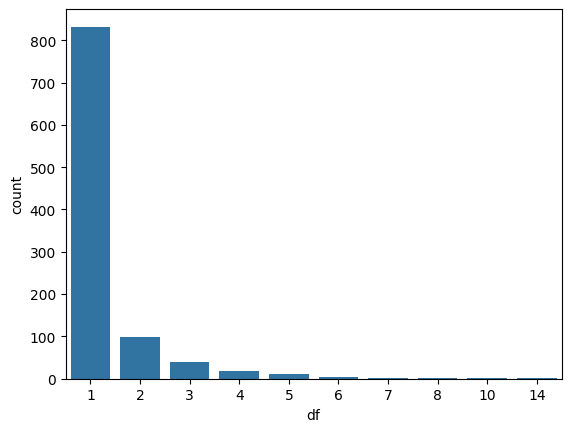

In [43]:
sns.barplot(df_count.df.value_counts(ascending=True))

In [44]:
N = len(X.toarray()) # Determines the number of documents
df_count["itf"] = np.log10(N / df_count.df)

for i in range(N):
    df_count[f"tf_{i}-itf"] = df_count[i].apply(lambda x: 1 + np.log10(x) if x > 0 else 0) * df_count["itf"]

df_count

,0,1,2,3,4,5,6,7,8,9,...,tf_10-itf,tf_11-itf,tf_12-itf,tf_13-itf,tf_14-itf,tf_15-itf,tf_16-itf,tf_17-itf,tf_18-itf,tf_19-itf
absurd,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,1.30103,0.0,0.00000,0.0,0.00000
accounts,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,1.30103
accustomed,1,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
acting,0,0,0,0,1,0,0,0,1,0,...,0.0,0.000000,0.823909,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
action,0,0,0,0,1,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,1.301030,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
yoda,0,0,0,0,0,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,1.30103,0.0,0.00000
york,0,0,0,0,1,0,0,0,0,0,...,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
young,0,0,1,0,0,0,0,0,0,1,...,0.0,0.823909,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000


In [45]:
df_count.drop(columns=[i for i in range(N)], inplace=True)

In [46]:
tf_itf_df = df_count[[f"tf_{i}-itf" for i in range(N)]]
tf_itf_df

,tf_0-itf,tf_1-itf,tf_2-itf,tf_3-itf,tf_4-itf,tf_5-itf,tf_6-itf,tf_7-itf,tf_8-itf,tf_9-itf,tf_10-itf,tf_11-itf,tf_12-itf,tf_13-itf,tf_14-itf,tf_15-itf,tf_16-itf,tf_17-itf,tf_18-itf,tf_19-itf
absurd,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,1.30103,0.0,0.00000,0.0,0.00000
accounts,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,1.30103
accustomed,1.30103,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
acting,0.00000,0.0,0.000000,0.000000,0.823909,0.0,0.0,0.0,0.823909,0.000000,0.0,0.000000,0.823909,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
action,0.00000,0.0,0.000000,0.000000,1.301030,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yes,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,1.301030,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
yoda,0.00000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,1.30103,0.0,0.00000
york,0.00000,0.0,0.000000,0.000000,1.301030,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000
young,0.00000,0.0,0.823909,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.823909,0.0,0.823909,0.000000,0.0,0.0,0.00000,0.0,0.00000,0.0,0.00000


In [65]:
cosine_similarity(tf_itf_df.iloc[5].to_numpy(), tf_itf_df.iloc[24].to_numpy())

# try to create a cosine similarity chart

0.0